In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10  # Import CIFAR10 dataset
from torch.utils.data import DataLoader

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)  # Change input channels to 3 for RGB images
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # Adjust input size based on the output size of the second convolutional layer
        self.fc2 = nn.Linear(256, 10)  # Output size is 10 for CIFAR-10 (10 classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 2

# Load CIFAR-10 dataset and create data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print('Koniec!')


100%|██████████| 170498071/170498071 [00:02<00:00, 77721476.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/2], Step [100/782], Loss: 1.3906
Epoch [1/2], Step [200/782], Loss: 0.9957
Epoch [1/2], Step [300/782], Loss: 1.2157
Epoch [1/2], Step [400/782], Loss: 0.7999
Epoch [1/2], Step [500/782], Loss: 0.9747
Epoch [1/2], Step [600/782], Loss: 0.9097
Epoch [1/2], Step [700/782], Loss: 0.9606
Epoch [2/2], Step [100/782], Loss: 0.6715
Epoch [2/2], Step [200/782], Loss: 1.0158
Epoch [2/2], Step [300/782], Loss: 0.7046
Epoch [2/2], Step [400/782], Loss: 0.8052
Epoch [2/2], Step [500/782], Loss: 0.9655
Epoch [2/2], Step [600/782], Loss: 0.9766
Epoch [2/2], Step [700/782], Loss: 0.9153
Koniec!


Files already downloaded and verified
Epoch [1/2], Step [100/782], Loss: 1.5578
Epoch [1/2], Step [200/782], Loss: 1.5678
Epoch [1/2], Step [300/782], Loss: 1.2704
Epoch [1/2], Step [400/782], Loss: 1.2510
Epoch [1/2], Step [500/782], Loss: 1.0475
Epoch [1/2], Step [600/782], Loss: 1.0916
Epoch [1/2], Step [700/782], Loss: 1.1446
Epoch [1/2], Training Accuracy: 0.6721
Epoch [2/2], Step [100/782], Loss: 0.8595
Epoch [2/2], Step [200/782], Loss: 1.1194
Epoch [2/2], Step [300/782], Loss: 0.8075
Epoch [2/2], Step [400/782], Loss: 1.0421
Epoch [2/2], Step [500/782], Loss: 0.8515
Epoch [2/2], Step [600/782], Loss: 0.6890
Epoch [2/2], Step [700/782], Loss: 0.6797
Epoch [2/2], Training Accuracy: 0.7701


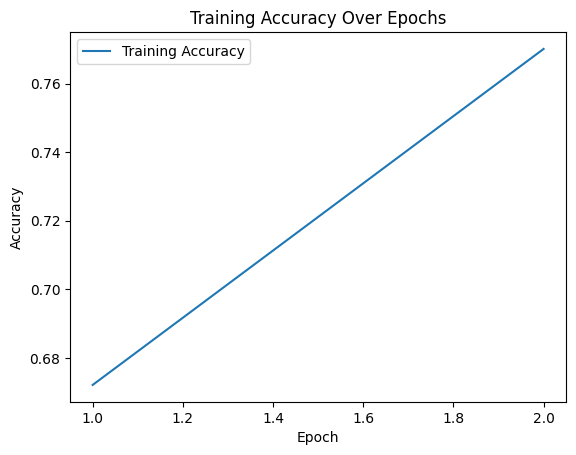

Koniec!


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 2

# Load CIFAR-10 dataset and create data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store accuracy values
train_accuracy_list = []

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Calculate accuracy on the training set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_accuracy_list.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {train_accuracy:.4f}')

# Plotting the accuracy curve
epochs_range = range(1, num_epochs + 1)
plt.plot(epochs_range, train_accuracy_list, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

print('Koniec!')
